## Project 2 - Regression Challenge

### Predict the price of homes at sale for the Ames Iowa Housing dataset

#### Data Exploration and Manipulation


In [1]:
# # Installations 
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
df_original = pd.read_csv('./Data/train (2).csv')
df_ktest_original = pd.read_csv('./Data/test (2).csv')


In [4]:
df = df_original.drop(['Id', 'PID'], axis=1)
df_ktest = df_ktest_original.drop(['Id', 'PID'], axis=1)

In [5]:
df_ktest.shape

(879, 78)

In [6]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [7]:
df_ktest.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [8]:
df.shape

(2051, 79)

In [9]:
df.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2051 non-null   int64  
 1   MS Zoning        2051 non-null   object 
 2   Lot Frontage     1721 non-null   float64
 3   Lot Area         2051 non-null   int64  
 4   Street           2051 non-null   object 
 5   Alley            140 non-null    object 
 6   Lot Shape        2051 non-null   object 
 7   Land Contour     2051 non-null   object 
 8   Utilities        2051 non-null   object 
 9   Lot Config       2051 non-null   object 
 10  Land Slope       2051 non-null   object 
 11  Neighborhood     2051 non-null   object 
 12  Condition 1      2051 non-null   object 
 13  Condition 2      2051 non-null   object 
 14  Bldg Type        2051 non-null   object 
 15  House Style      2051 non-null   object 
 16  Overall Qual     2051 non-null   int64  
 17  Overall Cond  

In [11]:
df.isnull().sum().sort_values(ascending=False)

Pool QC         2042
Misc Feature    1986
Alley           1911
Fence           1651
Mas Vnr Type    1240
                ... 
Misc Val           0
Mo Sold            0
Yr Sold            0
Sale Type          0
SalePrice          0
Length: 79, dtype: int64

In [12]:
# replace spaces in column names and convert all columns to lowercase:
df.columns = [x.lower().replace(' ','_') for x in df.columns]

In [13]:
df.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [14]:
df_object = df.select_dtypes(include=['object'])

In [15]:
df_numbers = df.select_dtypes(exclude=['object'])

In [16]:
df_object.head()

,ms_zoning,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,...,fireplace_qu,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc_feature,sale_type
0,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,...,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
1,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD
3,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,NaN,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,NaN,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,WD


In [17]:
df_numbers.head()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
0,60,NaN,13517,6,8,1976,2005,289.0,533.0,0.0,...,0,44,0,0,0,0,0,3,2010,130500
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,...,0,74,0,0,0,0,0,4,2009,220000
2,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,...,0,59,0,0,0,0,0,3,2010,138500


In [18]:
# counts the number of True values (which represent missing values), 
# sorts the values and returns ttop 15 columns with the highest number of missing values.
df_numbers.isnull().sum().sort_values(ascending=False)[:15]

lot_frontage      330
garage_yr_blt     114
mas_vnr_area       22
bsmt_full_bath      2
bsmt_half_bath      2
garage_cars         1
garage_area         1
bsmt_unf_sf         1
bsmtfin_sf_1        1
total_bsmt_sf       1
bsmtfin_sf_2        1
lot_area            0
ms_subclass         0
overall_cond        0
overall_qual        0
dtype: int64

In [19]:

df_numbers['lot_frontage'].fillna((0.0), inplace=True)
df_numbers['garage_yr_blt'].fillna((0.0), inplace=True)
df_numbers['mas_vnr_area'].fillna((0.0), inplace=True)
df_numbers['bsmt_half_bath'].fillna((0.0), inplace=True)
df_numbers['bsmt_full_bath'].fillna((0.0), inplace=True)
df_numbers['garage_cars'].fillna((0.0), inplace=True)
df_numbers['bsmtfin_sf_1'].fillna((0.0), inplace=True)
df_numbers['bsmtfin_sf_2'].fillna((0.0), inplace=True)
df_numbers['bsmt_unf_sf'].fillna((0.0), inplace=True)
df_numbers['total_bsmt_sf'].fillna((0.0), inplace=True)
df_numbers['garage_area'].fillna((0.0), inplace=True)

C:\Users\christiana.o.mensah\AppData\Local\Temp\ipykernel_34264\2132841692.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_numbers['lot_frontage'].fillna((0.0), inplace=True)
C:\Users\christiana.o.mensah\AppData\Local\Temp\ipykernel_34264\2132841692.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [20]:
df_numbers.isnull().sum().sort_values(ascending=False)[:15]

ms_subclass        0
lot_frontage       0
lot_area           0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
mas_vnr_area       0
bsmtfin_sf_1       0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
dtype: int64

In [21]:
df_numbers.head()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
0,60,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,...,0,44,0,0,0,0,0,3,2010,130500
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,...,0,74,0,0,0,0,0,4,2009,220000
2,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,...,0,59,0,0,0,0,0,3,2010,138500


In [22]:
# list comprehension
features_list = [each for each in df_numbers.columns if each != 'saleprice']

In [23]:
X = df_numbers[features_list]
y = df_numbers['saleprice']

In [24]:
X.head()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
0,60,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,...,475.0,0,44,0,0,0,0,0,3,2010
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,...,559.0,0,74,0,0,0,0,0,4,2009
2,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,...,246.0,0,52,0,0,0,0,0,1,2010
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,...,400.0,100,0,0,0,0,0,0,4,2010
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,...,484.0,0,59,0,0,0,0,0,3,2010


In [25]:
X.shape

(2051, 36)

In [26]:
y.shape

(2051,)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
X_test.shape

(513, 36)

In [29]:
y_test.shape

(513,)

In [30]:
X_train.shape

(1538, 36)

In [31]:
y_train.shape

(1538,)

In [32]:
df_numbers_corr = list(pd.concat([X_train, y_train],
                          axis=1).corr()['saleprice'].sort_values(ascending=False).index[1:38])

In [33]:

df_ktest_numbers_corr = list(pd.concat([X_test, y_test],
                          axis=1).corr()['saleprice'].sort_values(ascending=False).index[1:38])

df_ktest = X_test[df_ktest_numbers_corr]
df_ktest.shape

(513, 36)

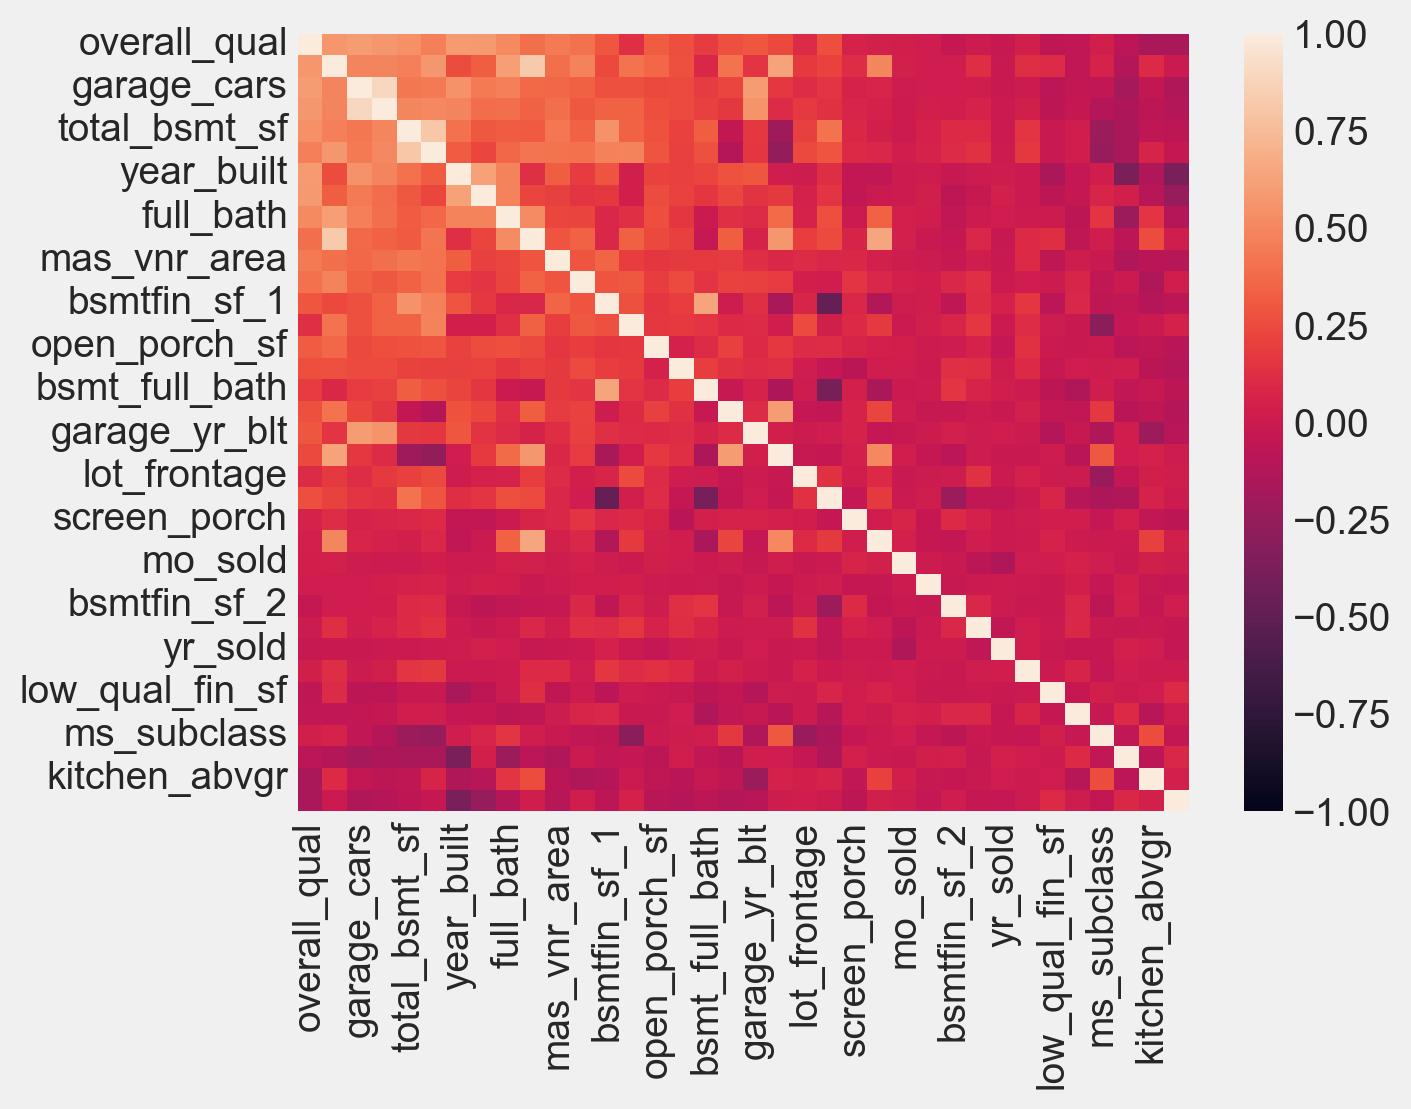

In [34]:
sns.heatmap(X_train[df_numbers_corr].corr(), vmin=-1, vmax=1);

In [35]:
X_train = X_train[df_numbers_corr]
X_test = X_test[df_numbers_corr]

In [36]:
X_test.shape

(513, 36)

In [37]:
X_train.columns

Index(['overall_qual', 'gr_liv_area', 'garage_cars', 'garage_area',
       'total_bsmt_sf', '1st_flr_sf', 'year_built', 'year_remod/add',
       'full_bath', 'totrms_abvgrd', 'mas_vnr_area', 'fireplaces',
       'bsmtfin_sf_1', 'lot_area', 'open_porch_sf', 'wood_deck_sf',
       'bsmt_full_bath', 'half_bath', 'garage_yr_blt', '2nd_flr_sf',
       'lot_frontage', 'bsmt_unf_sf', 'screen_porch', 'bedroom_abvgr',
       'mo_sold', '3ssn_porch', 'bsmtfin_sf_2', 'pool_area', 'yr_sold',
       'misc_val', 'low_qual_fin_sf', 'bsmt_half_bath', 'ms_subclass',
       'overall_cond', 'kitchen_abvgr', 'enclosed_porch'],
      dtype='object')

In [38]:
X_test.columns

Index(['overall_qual', 'gr_liv_area', 'garage_cars', 'garage_area',
       'total_bsmt_sf', '1st_flr_sf', 'year_built', 'year_remod/add',
       'full_bath', 'totrms_abvgrd', 'mas_vnr_area', 'fireplaces',
       'bsmtfin_sf_1', 'lot_area', 'open_porch_sf', 'wood_deck_sf',
       'bsmt_full_bath', 'half_bath', 'garage_yr_blt', '2nd_flr_sf',
       'lot_frontage', 'bsmt_unf_sf', 'screen_porch', 'bedroom_abvgr',
       'mo_sold', '3ssn_porch', 'bsmtfin_sf_2', 'pool_area', 'yr_sold',
       'misc_val', 'low_qual_fin_sf', 'bsmt_half_bath', 'ms_subclass',
       'overall_cond', 'kitchen_abvgr', 'enclosed_porch'],
      dtype='object')

#### Data Preprocessing 

**Preprocessing** in machine learning refers to the crucial initial phase of transforming raw data into a clean, structured, and suitable format for training and evaluating machine learning models. This process is essential because real-world data is often incomplete, inconsistent, noisy, or in a format incompatible with machine learning algorithms.


**PolynomialFeatures()** is a preprocessing tool within scikit-learn's preprocessing module in machine learning. It is used to generate polynomial and interaction features from existing features in a dataset. It's primary purpose is to allow linear models (like Linear Regression) to capture non-linear relationships in the data.


**StandardScaler()** in machine learning, particularly within the scikit-learn library, is a preprocessing technique used to standardize features by removing the mean and scaling to unit variance. This transformation results in a distribution with a mean of 0 and a standard deviation of 1. Many machine learning algorithms, especially those based on distance calculations (e.g., K-Nearest Neighbors, Support Vector Machines) or gradient descent (e.g., neural networks), are sensitive to the scale of features. StandardScaler ensures that all features contribute equally to the model, preventing features with larger numerical ranges from dominating those with smaller ranges.

In machine learning, **LogisticRegression()** typically often found within libraries like scikit-learn in Python. It is a supervised learning algorithm primarily used for binary classification tasks, although extensions exist for multi-class classification (Multinomial and Ordinal Logistic Regression). It models the probability of a binary outcome (e.g., spam/not spam, disease/no disease) based on a set of input features.


A machine learning (ML) **pipeline** is a structured means of automating the machine learning workflow by enabling data to be transformed and correlated into a model that can then be analyzed to achieve outputs

**Lasso** (Least Absolute Shrinkage and Selection Operator) is a regularization technique in machine learning, particularly useful for linear regression models. It performs both feature selection and regularization, helping to prevent overfitting and improve model interpretability. Lasso achieves this by adding a penalty term to the model's loss function, which shrinks some coefficients towards zero, effectively removing some features from the model. 

In [39]:
X_train.shape

(1538, 36)

In [40]:
y_test.shape

(513,)

In [41]:
X_train.columns

Index(['overall_qual', 'gr_liv_area', 'garage_cars', 'garage_area',
       'total_bsmt_sf', '1st_flr_sf', 'year_built', 'year_remod/add',
       'full_bath', 'totrms_abvgrd', 'mas_vnr_area', 'fireplaces',
       'bsmtfin_sf_1', 'lot_area', 'open_porch_sf', 'wood_deck_sf',
       'bsmt_full_bath', 'half_bath', 'garage_yr_blt', '2nd_flr_sf',
       'lot_frontage', 'bsmt_unf_sf', 'screen_porch', 'bedroom_abvgr',
       'mo_sold', '3ssn_porch', 'bsmtfin_sf_2', 'pool_area', 'yr_sold',
       'misc_val', 'low_qual_fin_sf', 'bsmt_half_bath', 'ms_subclass',
       'overall_cond', 'kitchen_abvgr', 'enclosed_porch'],
      dtype='object')

In [42]:
# LassoCv model using only num variables and replacing nulls with 0 for each variables
pipe = Pipeline([
    ('pf', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('lcv', LassoCV(n_alphas=500, max_iter=1000))
])

pipe.fit(X_train, y_train)

print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))


C:\Users\christiana.o.mensah\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1622: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(


0.91188628845127
0.9081957725733374


In [43]:
pipe.named_steps['lcv'].alpha_

np.float64(1239.4303272508876)

In [44]:
X_test.head()

,overall_qual,gr_liv_area,garage_cars,garage_area,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,full_bath,totrms_abvgrd,...,bsmtfin_sf_2,pool_area,yr_sold,misc_val,low_qual_fin_sf,bsmt_half_bath,ms_subclass,overall_cond,kitchen_abvgr,enclosed_porch
1124,5,954,2.0,576.0,911.0,954,1976,1976,1,6,...,0.0,0,2006,0,0,0.0,80,5,1,0
188,7,2157,2.0,487.0,924.0,1216,1966,1966,2,8,...,0.0,0,2006,0,0,0.0,60,6,1,0
1727,8,2088,3.0,656.0,948.0,948,2007,2007,2,10,...,0.0,0,2008,0,0,0.0,60,5,1,0
1658,6,1647,1.0,216.0,806.0,841,1915,1950,1,6,...,0.0,0,2010,0,0,0.0,70,4,1,136
1424,7,1737,2.0,578.0,851.0,851,2006,2006,2,7,...,0.0,0,2006,0,0,0.0,60,5,1,0


In [45]:
# replace spaces in column names and convert all columns to lowercase:
df_ktest.columns = [x.lower().replace(' ','_') for x in df_ktest.columns]

In [46]:
df_ktest.head()

,overall_qual,gr_liv_area,1st_flr_sf,total_bsmt_sf,garage_area,garage_cars,year_built,year_remod/add,full_bath,mas_vnr_area,...,mo_sold,misc_val,bsmtfin_sf_2,yr_sold,low_qual_fin_sf,bsmt_half_bath,ms_subclass,overall_cond,kitchen_abvgr,enclosed_porch
1124,5,954,954,911.0,576.0,2.0,1976,1976,1,0.0,...,7,0,0.0,2006,0,0.0,80,5,1,0
188,7,2157,1216,924.0,487.0,2.0,1966,1966,2,309.0,...,5,0,0.0,2006,0,0.0,60,6,1,0
1727,8,2088,948,948.0,656.0,3.0,2007,2007,2,108.0,...,6,0,0.0,2008,0,0.0,60,5,1,0
1658,6,1647,841,806.0,216.0,1.0,1915,1950,1,0.0,...,5,0,0.0,2010,0,0.0,70,4,1,136
1424,7,1737,851,851.0,578.0,2.0,2006,2006,2,0.0,...,8,0,0.0,2006,0,0.0,60,5,1,0


In [47]:
df_ktest_numbers =df_ktest.select_dtypes(exclude=['object'])

In [48]:
df_ktest_numbers.shape

(513, 36)

In [49]:
df_ktest_numbers.isnull().sum().sort_values(ascending=False)[:15]

overall_qual      0
gr_liv_area       0
1st_flr_sf        0
total_bsmt_sf     0
garage_area       0
garage_cars       0
year_built        0
year_remod/add    0
full_bath         0
mas_vnr_area      0
fireplaces        0
totrms_abvgrd     0
bsmtfin_sf_1      0
wood_deck_sf      0
open_porch_sf     0
dtype: int64

In [50]:
df_ktest_numbers['lot_frontage'].fillna((0.0), inplace=True)
df_ktest_numbers['garage_yr_blt'].fillna((0.0), inplace=True)
df_ktest_numbers['mas_vnr_area'].fillna((0.0), inplace=True)


C:\Users\christiana.o.mensah\AppData\Local\Temp\ipykernel_34264\2842248250.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ktest_numbers['lot_frontage'].fillna((0.0), inplace=True)
C:\Users\christiana.o.mensah\AppData\Local\Temp\ipykernel_34264\2842248250.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [51]:
df_ktest_numbers.isnull().sum().sort_values(ascending=False)[:15]

overall_qual      0
gr_liv_area       0
1st_flr_sf        0
total_bsmt_sf     0
garage_area       0
garage_cars       0
year_built        0
year_remod/add    0
full_bath         0
mas_vnr_area      0
fireplaces        0
totrms_abvgrd     0
bsmtfin_sf_1      0
wood_deck_sf      0
open_porch_sf     0
dtype: int64

In [52]:
X_train.shape

(1538, 36)

In [53]:
df_ktest_numbers.shape

(513, 36)

In [54]:
# probably need to drop 'id' from both

In [55]:
X_train[sorted(X_train.columns)].head()

,1st_flr_sf,2nd_flr_sf,3ssn_porch,bedroom_abvgr,bsmt_full_bath,bsmt_half_bath,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,enclosed_porch,...,overall_cond,overall_qual,pool_area,screen_porch,total_bsmt_sf,totrms_abvgrd,wood_deck_sf,year_built,year_remod/add,yr_sold
532,1587,0,0,3,0.0,0.0,749.0,838.0,0.0,0,...,6,6,0,0,1587.0,7,0,1971,1971,2007
415,1262,1005,0,3,1.0,0.0,717.0,288.0,0.0,0,...,8,7,0,0,1005.0,7,521,1937,1980,2007
273,864,0,0,3,1.0,0.0,317.0,398.0,149.0,0,...,8,5,0,0,864.0,5,194,1950,2002,2007
1460,1306,954,0,3,1.0,0.0,105.0,1201.0,0.0,0,...,5,7,0,0,1306.0,7,296,1996,1997,2010
250,1251,1250,0,4,0.0,0.0,1242.0,0.0,0.0,0,...,7,8,0,0,1242.0,9,192,1995,1995,2008


In [56]:
df_ktest_numbers[sorted(df_ktest_numbers)].head()

,1st_flr_sf,2nd_flr_sf,3ssn_porch,bedroom_abvgr,bsmt_full_bath,bsmt_half_bath,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,enclosed_porch,...,overall_cond,overall_qual,pool_area,screen_porch,total_bsmt_sf,totrms_abvgrd,wood_deck_sf,year_built,year_remod/add,yr_sold
1124,954,0,0,3,0.0,0.0,428.0,483.0,0.0,0,...,5,5,0,0,911.0,6,0,1976,1976,2006
188,1216,941,0,4,0.0,0.0,479.0,445.0,0.0,0,...,6,7,0,0,924.0,8,105,1966,1966,2006
1727,948,1140,0,4,0.0,0.0,908.0,40.0,0.0,0,...,5,8,0,0,948.0,10,100,2007,2007,2008
1658,841,806,0,4,1.0,0.0,806.0,0.0,0.0,136,...,4,6,0,0,806.0,6,0,1915,1950,2010
1424,851,886,0,3,0.0,0.0,851.0,0.0,0.0,0,...,5,7,0,0,851.0,7,0,2006,2006,2006


In [57]:
# ^ (Symmetric difference) This is the symmetric difference operator for sets in Python.
# It returns a new set containing all elements that are in either of the two sets but not in their intersection. 
# In other words, it reveals the column names that are unique to one set or the other. 

set(df_ktest_numbers.columns) ^ set(X_train.columns)

set()

In [58]:
X_train.columns

Index(['overall_qual', 'gr_liv_area', 'garage_cars', 'garage_area',
       'total_bsmt_sf', '1st_flr_sf', 'year_built', 'year_remod/add',
       'full_bath', 'totrms_abvgrd', 'mas_vnr_area', 'fireplaces',
       'bsmtfin_sf_1', 'lot_area', 'open_porch_sf', 'wood_deck_sf',
       'bsmt_full_bath', 'half_bath', 'garage_yr_blt', '2nd_flr_sf',
       'lot_frontage', 'bsmt_unf_sf', 'screen_porch', 'bedroom_abvgr',
       'mo_sold', '3ssn_porch', 'bsmtfin_sf_2', 'pool_area', 'yr_sold',
       'misc_val', 'low_qual_fin_sf', 'bsmt_half_bath', 'ms_subclass',
       'overall_cond', 'kitchen_abvgr', 'enclosed_porch'],
      dtype='object')

In [59]:
df_ktest_numbers.columns
df_ktest_numbers.columns

Index(['overall_qual', 'gr_liv_area', '1st_flr_sf', 'total_bsmt_sf',
       'garage_area', 'garage_cars', 'year_built', 'year_remod/add',
       'full_bath', 'mas_vnr_area', 'fireplaces', 'totrms_abvgrd',
       'bsmtfin_sf_1', 'wood_deck_sf', 'open_porch_sf', 'half_bath',
       'lot_area', 'bsmt_unf_sf', 'garage_yr_blt', 'bsmt_full_bath',
       '2nd_flr_sf', 'lot_frontage', 'bedroom_abvgr', 'screen_porch',
       '3ssn_porch', 'pool_area', 'mo_sold', 'misc_val', 'bsmtfin_sf_2',
       'yr_sold', 'low_qual_fin_sf', 'bsmt_half_bath', 'ms_subclass',
       'overall_cond', 'kitchen_abvgr', 'enclosed_porch'],
      dtype='object')

In [60]:
df_ktest_numbers = df_ktest_numbers[pipe.feature_names_in_]

In [61]:
preds = pipe.predict(df_ktest_numbers)

In [62]:
ids = df_ktest_original['Id'][:513]

preds_df = pd.DataFrame({
    'Id': ids,
    'saleprice': preds
})
preds_df.head(10)

,Id,saleprice
0,2658,125888.678056
1,2718,233357.089122
2,2414,263463.083475
3,1989,125588.295866
4,625,202656.617194
5,333,338473.842298
6,1327,159804.771358
7,858,278424.407238
8,95,175511.032979
9,1568,87695.910004


In [63]:
import datetime

now = str(datetime.datetime.now())

f'predictions_{now}'

now1 = str(datetime.datetime.now())
preds_df.to_csv('kaggle_Preds_{now1}', index=False)

In [64]:
# pd.read_csv('kaggle_Preds_{now1}')